In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt


In [29]:
df = pd. read_csv("Diabetes.csv")
df. head()

,Number_of_times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skin_fold_thickness,2_Hour_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age_(years),Class_variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [30]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number_of_times_pregnant      768 non-null    int64  
 1   Plasma_glucose_concentration  768 non-null    int64  
 2   Diastolic_blood_pressure      768 non-null    int64  
 3   Triceps_skin_fold_thickness   768 non-null    int64  
 4   2_Hour_serum_insulin          768 non-null    int64  
 5   Body_mass_index               768 non-null    float64
 6   Diabetes_pedigree_function    768 non-null    float64
 7   Age_(years)                   768 non-null    int64  
 8   Class_variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [31]:
df. shape

(768, 9)

In [32]:
df. isna(). sum()

Number_of_times_pregnant        0
Plasma_glucose_concentration    0
Diastolic_blood_pressure        0
Triceps_skin_fold_thickness     0
2_Hour_serum_insulin            0
Body_mass_index                 0
Diabetes_pedigree_function      0
Age_(years)                     0
Class_variable                  0
dtype: int64

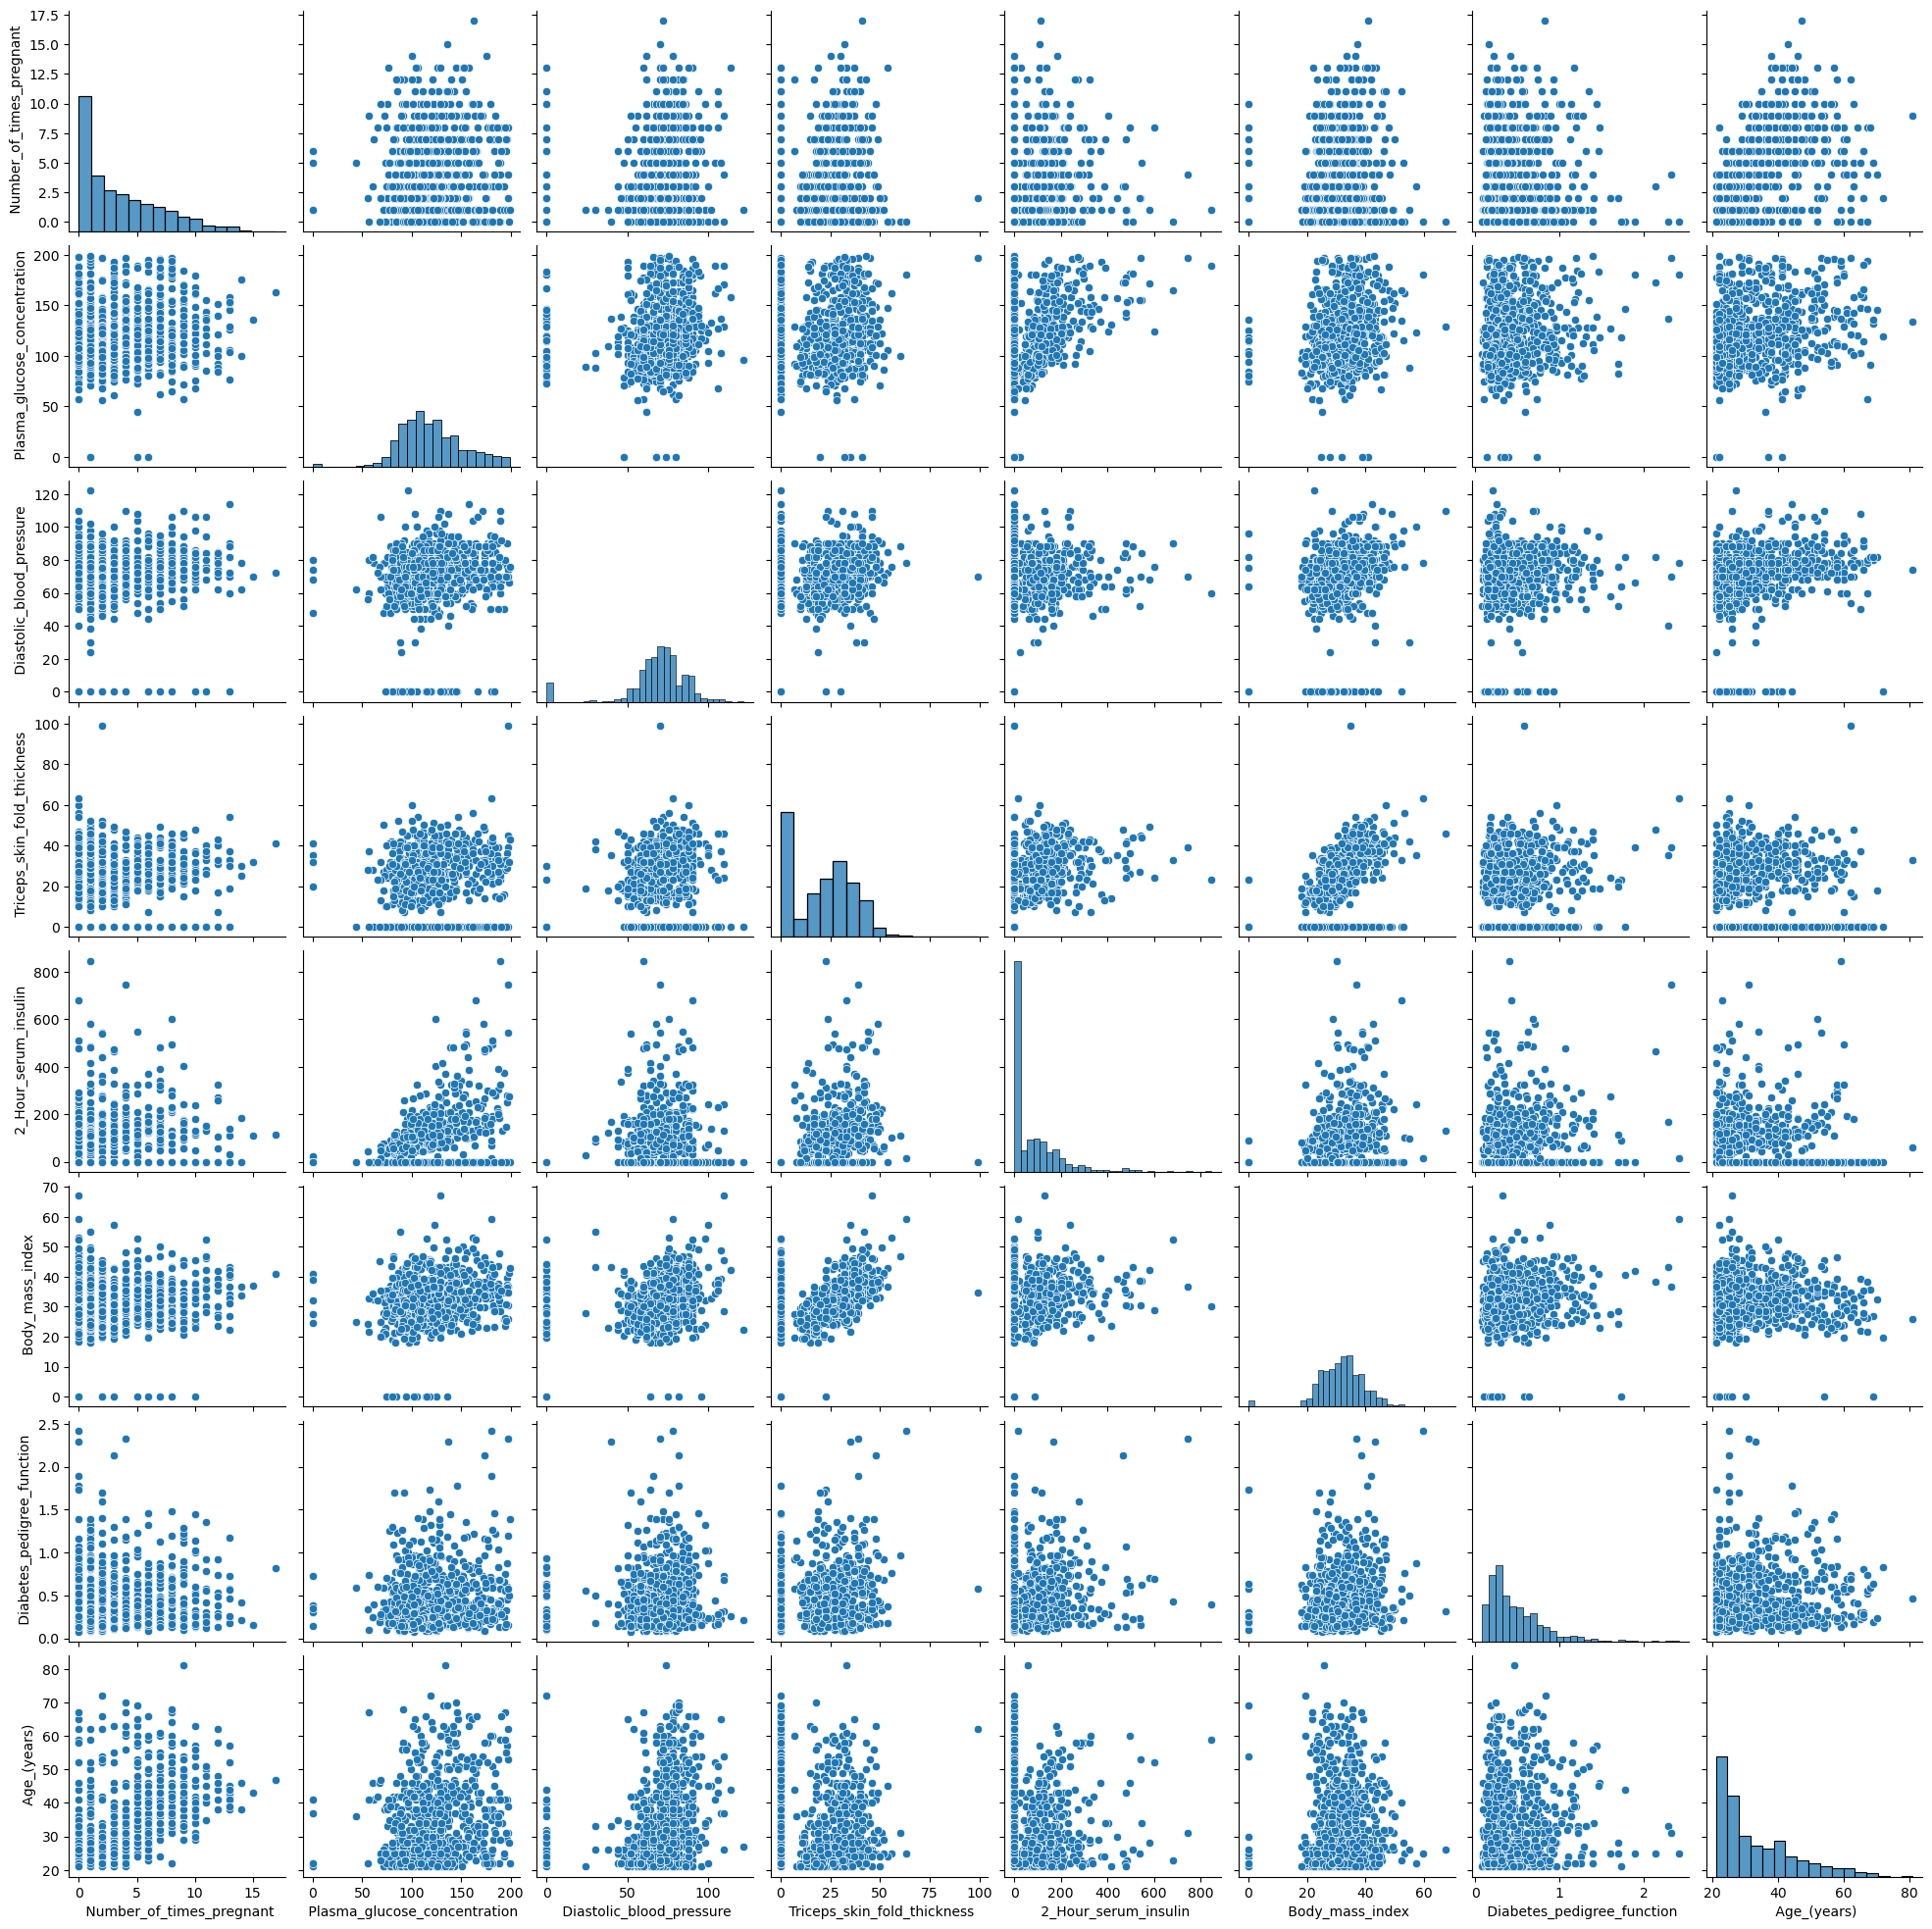

In [22]:
sns. pairplot(df.iloc[:,:])

Text(0.5, 1.0, 'correlaation betwwen features')

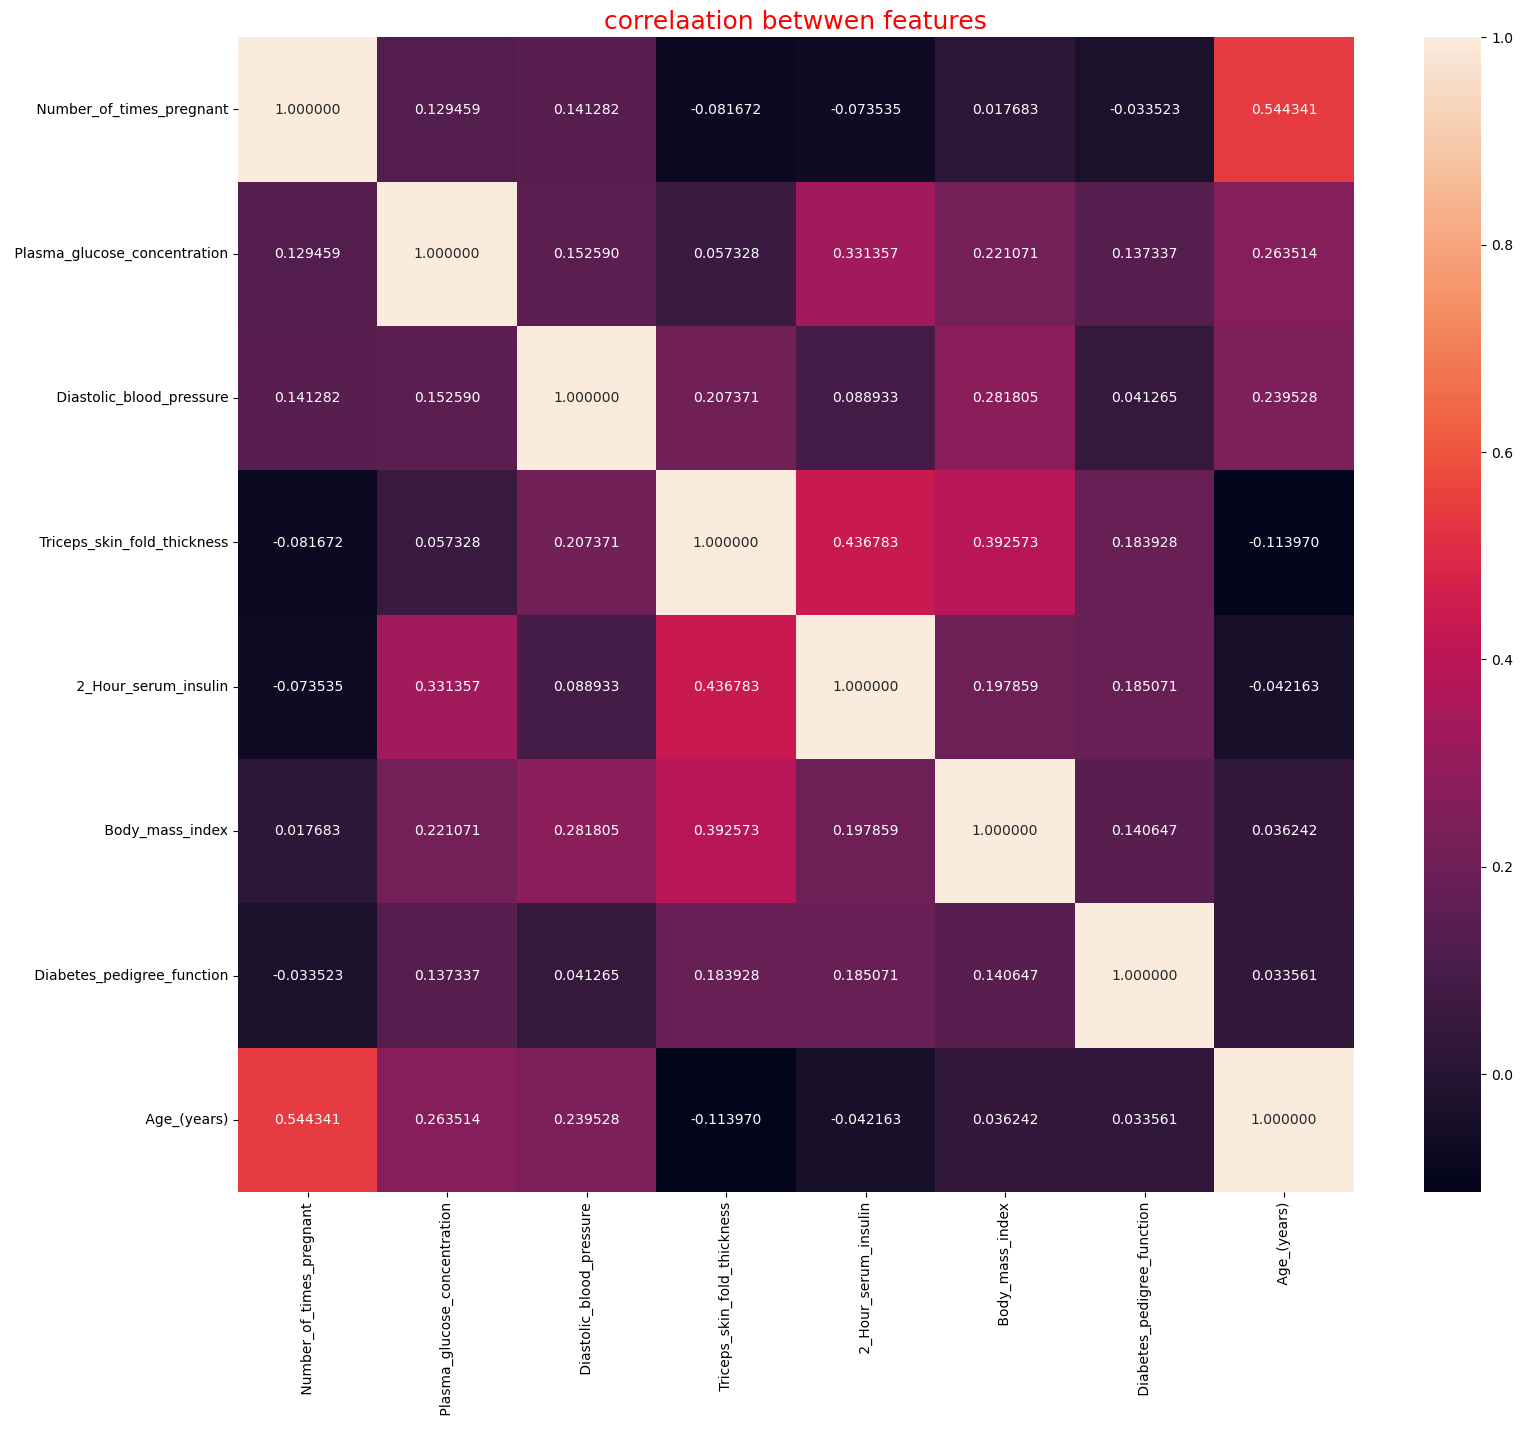

In [23]:
#heat map
plt. figure(figsize = (18,15))
sns. heatmap(df. corr(), annot = True, fmt = "2f")
plt. title("correlaation betwwen features", fontsize = 18, color = "red")

In [34]:
df. Class_variable. value_counts(normalize = True)

NO     0.651042
YES    0.348958
Name: Class_variable, dtype: float64

In [35]:
df["Class_variable"]. unique()

array(['YES', 'NO'], dtype=object)

In [36]:
colnames = list(df. columns)

In [37]:
predictors = colnames[:8]

In [38]:
target = colnames[8]

In [40]:
#spliting data into training and testing dataset
from sklearn. model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25)

In [41]:
from sklearn.tree import DecisionTreeClassifier as DT

In [42]:
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

In [43]:
# Prediction on Test Data
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,NO,YES
Actual,,
NO,100,26
YES,22,44


In [44]:
np.mean(preds == test[target]) # Test Data Accuracy 

0.75

In [45]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,NO,YES
Actual,,
NO,374,0
YES,0,202


In [46]:
np.mean(preds == train[target]) # Train Data Accuracy


1.0

# Automatic Tuning - Hyperparameters
######
# GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model = DT(criterion = 'entropy')

In [49]:
param_grid = {'min_samples_leaf': [1, 5, 10, 20],
              'max_depth': [2, 4, 6, 8, 10],
              'max_features': ['sqrt']}

In [50]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 5, 
                                refit=True, return_train_score=True)

In [51]:
grid_search.fit(train[predictors], train[target])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [52]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 20}

In [53]:
cv_dt_clf_grid = grid_search.best_estimator_

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
confusion_matrix(test[target], cv_dt_clf_grid.predict(test[predictors]))
accuracy_score(test[target], cv_dt_clf_grid.predict(test[predictors]))

0.7291666666666666

In [56]:
# Evaluation on Training Data
confusion_matrix(train[target], cv_dt_clf_grid.predict(train[predictors]))
accuracy_score(train[target], cv_dt_clf_grid.predict(train[predictors]))

0.7795138888888888

In [57]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [60]:
model = DT(criterion = 'entropy')

In [59]:
param_dist = {'min_samples_leaf': list(range(1, 1500)),
              'max_depth': list(range(2, 1000)),
              'max_features': ['sqrt']}

In [61]:
n_iter = 100

In [62]:
model_random_search = RandomizedSearchCV(estimator = model,
                                         param_distributions = param_dist,
                                         n_iter = n_iter)

In [63]:
model_random_search.fit(train[predictors], train[target])

RandomizedSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=100,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                         

In [64]:
model_random_search.best_params_

{'min_samples_leaf': 19, 'max_features': 'sqrt', 'max_depth': 549}

In [65]:
dT_random = model_random_search.best_estimator_

In [66]:
#prediciton on test data 
pred_random = dT_random.predict(test[predictors])
pd.crosstab(test[target], pred_random, rownames=['Actual'], colnames=['Predictions'])

np.mean(pred_random == test[target])


0.703125

In [67]:
#predicition on train data 
pred_random = dT_random.predict(train[predictors])
pd.crosstab(train[target], pred_random, rownames = ['Actual'], colnames = ['Predictions'])

np.mean(pred_random == train[target])

0.7604166666666666